In [2]:
import pandas as pd
import numpy as np
import json

In [3]:
with open('yelp_academic_dataset_review.json') as f:
    data = []
    i = 0
    for line in f:
        i += 1
        if i > 50000:
            break
        j_content = json.loads(line)
        data.append(j_content)

In [4]:
data_df = pd.DataFrame(data)

In [5]:
data_df.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg


## EDA

## MODELS

In [6]:
train_df = data_df.iloc[:40000]
val_df = data_df.iloc[40000:45000]
test_df =  data_df.iloc[45000:]

In [13]:
train_df['stars'].value_counts(normalize = True)

5.0    0.443450
4.0    0.221125
1.0    0.145525
3.0    0.109775
2.0    0.080125
Name: stars, dtype: float64

In [14]:
train_df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,Q1sbwvVQXV2734tPgoKj4Q,1.0,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,GJXCdrto3ASJOqKeVWPi6Q,5.0,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,2TzJjDVDEuAW6MR5Vuc1ug,5.0,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,yi0R0Ugj_xUx_Nek0-_Qig,5.0,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,11a8sVPMUFtaC7_ABRkmtw,1.0,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ


In [15]:
train_df['useful'].value_counts(normalize = True)[0]

0.54335

In [16]:
train_df['funny'].value_counts(normalize = True)[0]

0.79805

In [17]:
train_df['cool'].value_counts(normalize = True)[0]

0.754175

In [18]:
val_df['stars'].value_counts(normalize = True)

5.0    0.4538
4.0    0.2234
1.0    0.1486
3.0    0.1060
2.0    0.0682
Name: stars, dtype: float64

In [19]:
test_df['stars'].value_counts(normalize = True)

5.0    0.4528
4.0    0.2200
1.0    0.1362
3.0    0.1092
2.0    0.0818
Name: stars, dtype: float64

In [20]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
porter = PorterStemmer()

In [21]:
from collections import defaultdict
import string
from nltk.corpus import stopwords

In [22]:
wordCount = defaultdict(int)
punctuation = set(string.punctuation)
stopWordSet = set(stopwords.words("english"))


train_text = []
for index, d in train_df.iterrows():
    r = ''.join([c for c in d['text'].lower() if not (c in punctuation)])
    r = ' '.join([porter.stem(word) for word in r.split() if word not in stopWordSet])
    train_text.append(r)
    for w in r.split():
        wordCount[w] += 1
train_df['text'] = train_text   
    
val_text = []
for index, d in val_df.iterrows():
    r = ''.join([c for c in d['text'].lower() if not (c in punctuation)])
    r = ' '.join([porter.stem(word) for word in r.split() if word not in stopWordSet])
    val_text.append(r)
val_df['text'] = val_text   

test_text = []
for index, d in test_df.iterrows():
    r = ''.join([c for c in d['text'].lower() if not (c in punctuation)])
    r = ' '.join([porter.stem(word) for word in r.split() if word not in stopWordSet])
    test_text.append(r)
test_df['text'] = test_text

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

In [23]:
most_common = pd.Series(wordCount).sort_values(ascending = False).iloc[:10000]
vocabulary = most_common.index.tolist()

In [24]:
## bag of words

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(vocabulary=vocabulary)

train_text_data = train_df['text'].values.tolist()
train_X = count_vect.fit_transform(train_text_data)
train_y = train_df['stars'].values.tolist()

val_text_data = val_df['text'].values.tolist()
val_X = count_vect.fit_transform(val_text_data)
val_y = val_df['stars'].values.tolist()


In [26]:
test_text_data = test_df['text'].values.tolist()
test_X = count_vect.fit_transform(test_text_data)
test_y = test_df['stars'].values.tolist()

In [27]:
## tf_idf

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
train_X_tfidf = transformer.fit_transform(train_X)
val_X_tfidf = transformer.fit_transform(val_X)

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1247: RuntimeWarning: divide by zero encountered in true_divide
  idf = np.log(n_samples / df) + 1


In [29]:
test_X_tfidf = transformer.fit_transform(test_X)

In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C = 0.8)
clf = clf.fit(train_X, train_y)
print(clf.score(train_X, train_y))
print(clf.score(val_X, val_y))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.827525
0.6382


## tf-idf

In [31]:
clf_tfidf = LogisticRegression(C = 0.8).fit(train_X_tfidf, train_y)
print(clf_tfidf.score(train_X_tfidf, train_y))
print(clf_tfidf.score(val_X_tfidf, val_y))

0.715125
0.6616


In [32]:
pd.Series(clf_tfidf.predict(val_X_tfidf)).value_counts(normalize = True)

5.0    0.5680
4.0    0.1918
1.0    0.1574
3.0    0.0570
2.0    0.0258
dtype: float64

In [33]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(clf.predict(train_X), train_y)
print(train_mse)
val_mse = mean_squared_error(clf.predict(val_X), val_y)
print(val_mse)

0.4021
0.9342


In [34]:
c_list = [0.01, 0.1, 0.5, 1, 10, 30, 80]

In [35]:
train_mse_Cs = []
val_mse_Cs = []
for c in c_list:
    clf_tfidf = LogisticRegression(C = c).fit(train_X_tfidf, train_y)
    train_mse = mean_squared_error(clf_tfidf.predict(train_X_tfidf), train_y)
    train_mse_Cs.append(train_mse)
    val_mse = mean_squared_error(clf_tfidf.predict(val_X_tfidf), val_y)
    val_mse_Cs.append(val_mse)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

In [40]:
train_mse_Cs

[3.591175, 1.3741, 0.8394, 0.70965, 0.40625, 0.3055, 0.24015]

In [41]:
val_mse_Cs

[3.5514, 1.393, 0.977, 0.9252, 0.892, 0.9196, 0.973]

In [42]:
plot_df = pd.DataFrame(c_list*2, columns=['Cs'])
plot_df['MSE'] = train_mse_Cs + val_mse_Cs
plot_df['Type'] = ['train']*len(c_list)+['test']*len(c_list)
plot_df['Cs'] = plot_df['Cs'].apply(lambda x: str(x))

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Cs", y="mse", hue="type", data = plot_df)
ax.set_title("Training MSE Vs Validating MSE Over Different Cs");

ValueError: Could not interpret input 'mse'

In [43]:
clf_tfidf = LogisticRegression(C = 10).fit(train_X_tfidf, train_y)
print(mean_squared_error(clf_tfidf.predict(train_X_tfidf), train_y))
print(mean_squared_error(clf_tfidf.predict(val_X_tfidf), val_y))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.40625
0.892


In [44]:
print(mean_squared_error(clf_tfidf.predict(test_X_tfidf), test_y))

0.8832


In [45]:
(clf_tfidf.predict(test_X_tfidf) == test_y).mean()

0.634

In [46]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(clf_tfidf.predict(train_X_tfidf), train_y)
print(train_mse)
val_mse = mean_squared_error(clf_tfidf.predict(val_X_tfidf), val_y)
print(val_mse)

0.40625
0.892


In [160]:
data_df.groupby(['stars']).useful.mean()

stars
1.0    1.940097
2.0    1.467509
3.0    1.303091
4.0    1.299403
5.0    0.989987
Name: useful, dtype: float64

In [161]:
data_df.groupby(['stars']).funny.mean()

stars
1.0    0.569082
2.0    0.608597
3.0    0.547832
4.0    0.525673
5.0    0.302546
Name: funny, dtype: float64

In [162]:
data_df.groupby(['stars']).cool.mean()

stars
1.0    0.222774
2.0    0.385841
3.0    0.638010
4.0    0.808715
5.0    0.516860
Name: cool, dtype: float64

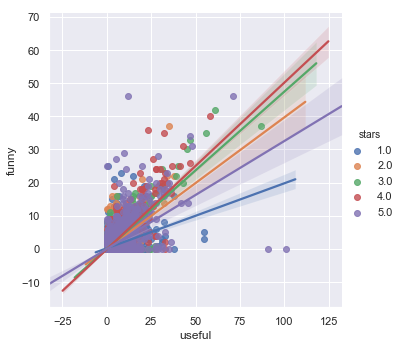

In [159]:
sns.lmplot(x="useful", y="funny", hue="stars", data=data_df)

## generate new features: useful/cool

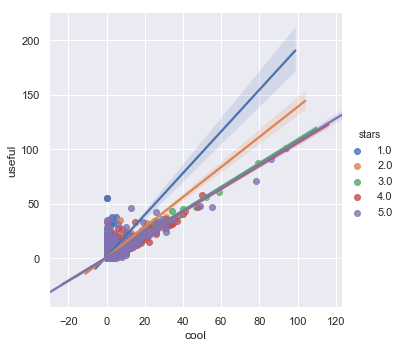

In [204]:
sns.lmplot(x="cool", y="useful", hue="stars", data=data_df);

## generate new features: funny/cool

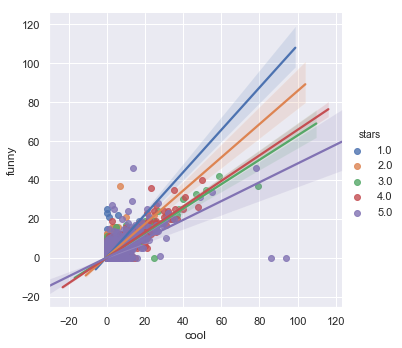

In [203]:
sns.lmplot(x="cool", y="funny", hue="stars", data=data_df);

In [47]:
train_df['useful/cool'] = train_df['useful']/train_df['cool']
train_df['funny/cool'] = train_df['funny']/train_df['cool']

val_df['useful/cool'] = val_df['useful']/val_df['cool']
val_df['funny/cool'] = val_df['funny']/val_df['cool']

test_df['useful/cool'] = test_df['useful']/test_df['cool']
test_df['funny/cool'] = test_df['funny']/test_df['cool']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [48]:
train_df['useful/cool'] = train_df['useful/cool'].replace([np.inf, -np.inf], np.nan)
train_df['funny/cool'] = train_df['funny/cool'].replace([np.inf, -np.inf], np.nan)

val_df['useful/cool'] = val_df['useful/cool'].replace([np.inf, -np.inf], np.nan)
val_df['funny/cool'] = val_df['funny/cool'].replace([np.inf, -np.inf], np.nan)

test_df['useful/cool'] = test_df['useful/cool'].replace([np.inf, -np.inf], np.nan)
test_df['funny/cool'] = test_df['funny/cool'].replace([np.inf, -np.inf], np.nan)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [49]:
funny_cool_mean = train_df['funny/cool'].dropna().mean()

In [50]:
useful_cool_mean = train_df['useful/cool'].dropna().mean()

In [51]:
train_df['useful/cool'] = train_df['useful/cool'].replace([np.nan], useful_cool_mean)
train_df['funny/cool'] = train_df['funny/cool'].replace([np.nan], funny_cool_mean)

val_df['useful/cool'] = val_df['useful/cool'].replace([np.nan], useful_cool_mean)
val_df['funny/cool'] = val_df['funny/cool'].replace([np.nan], funny_cool_mean)

test_df['useful/cool'] = test_df['useful/cool'].replace([np.nan], useful_cool_mean)
test_df['funny/cool'] = test_df['funny/cool'].replace([np.nan], funny_cool_mean)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [52]:
from sklearn.preprocessing import StandardScaler
scaler_useful = StandardScaler()
scaler_funny = StandardScaler()
scaler_useful.fit(train_df['useful/cool'].values.reshape(-1,1))
scaler_funny.fit(train_df['funny/cool'].values.reshape(-1,1))

train_df['useful/cool'] = scaler_useful.transform(train_df['useful/cool'].values.reshape(-1,1))
train_df['funny/cool'] = scaler_funny.transform(train_df['funny/cool'].values.reshape(-1,1))

val_df['useful/cool'] = scaler_useful.transform(val_df['useful/cool'].values.reshape(-1,1))
val_df['funny/cool'] = scaler_funny.transform(val_df['funny/cool'].values.reshape(-1,1))

test_df['useful/cool'] = scaler_useful.transform(test_df['useful/cool'].values.reshape(-1,1))
test_df['funny/cool'] = scaler_funny.transform(test_df['funny/cool'].values.reshape(-1,1))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

In [53]:
prob_predictions_train = clf_tfidf.predict_proba(train_X_tfidf)
log_prob_predictions_train = clf_tfidf.predict_log_proba(train_X_tfidf)

prob_predictions_val = clf_tfidf.predict_proba(val_X_tfidf)
log_prob_predictions_val = clf_tfidf.predict_log_proba(val_X_tfidf)

prob_predictions_test = clf_tfidf.predict_proba(test_X_tfidf)
log_prob_predictions_test = clf_tfidf.predict_log_proba(test_X_tfidf)

In [54]:
train_final = np.hstack((prob_predictions_train, train_df[['useful/cool', 'funny/cool']]))
val_final = np.hstack((prob_predictions_val, val_df[['useful/cool', 'funny/cool']]))
test_final = np.hstack((prob_predictions_test, test_df[['useful/cool', 'funny/cool']]))

In [71]:
c_list = [0.01, 0.1, 0.5, 1, 10, 30, 80]

In [72]:
train_mse = []
val_mse = []
for c in c_list:
    clf_final = LogisticRegression(C = c).fit(train_final, train_y)
    train_mse.append(mean_squared_error(clf_final.predict(train_final), train_y))
    val_mse.append(mean_squared_error(clf_final.predict(val_final), val_y))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

In [73]:
train_mse

[0.414825, 0.3758, 0.373075, 0.37345, 0.372525, 0.372775, 0.372775]

In [74]:
val_mse

[0.8916, 0.8774, 0.8706, 0.871, 0.871, 0.8692, 0.8692]

In [75]:
c_list

[0.01, 0.1, 0.5, 1, 10, 30, 80]

In [76]:
clf_opt = LogisticRegression(C = 30).fit(train_final, train_y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [77]:
test_pred = clf_opt.predict(test_final)

In [78]:
acc = np.mean(test_pred == test_y)

In [80]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_pred, test_y)

0.8258

In [79]:
acc

0.6358

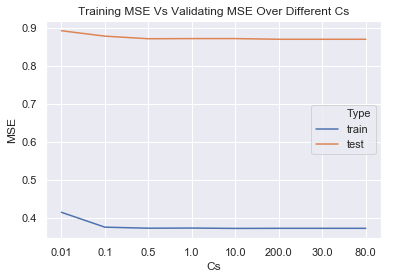

In [70]:
plot_df = pd.DataFrame(c_list*2, columns=['Cs'])
plot_df['MSE'] = train_mse + val_mse
plot_df['Type'] = ['train']*len(c_list)+['test']*len(c_list)
plot_df['Cs'] = plot_df['Cs'].apply(lambda x: str(x))

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Cs", y="MSE", hue="Type", data = plot_df)
ax.set_title("Training MSE Vs Validating MSE Over Different Cs");

In [ ]:
clf_opt = LogisticRegression(C = ).fit(train_final, train_y)

In [58]:
test_final.shape

(5000, 7)

In [332]:
c_list

[0.01, 0.1, 0.5, 1, 10, 30, 80]

In [333]:
train_mse

[0.414825, 0.3758, 0.373075, 0.37345, 0.372525, 0.372775, 0.372775]

In [334]:
val_mse

[0.8916, 0.8774, 0.8706, 0.871, 0.871, 0.8692, 0.8692]

In [335]:
check_valid_num = (train_df['useful']/train_df['cool']).apply(lambda x: not (np.isinf(x) or np.isnan(x)))

In [336]:
1 - check_valid_num.mean()

0.754175

In [ ]:
## 只有一点点improvement的原因：百分之75.41的数据没有这个比例

In [ ]:
## date vs stars

In [144]:
data_df['date'][0]

'2013-05-07 04:34:36'

In [147]:
from datetime import datetime
xx = data_df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data_df['date'] = xx

In [149]:
data_df['month'] = data_df['date'].apply(lambda x: x.month)
data_df['date_'] = data_df['date'].apply(lambda x: x.day)
data_df['dayOfWeek'] = data_df['date'].apply(lambda x: x.isoweekday())
data_df['hour'] = data_df['date'].apply(lambda x: x.hour)

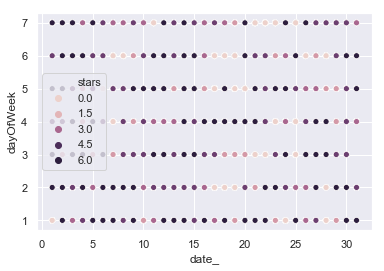

In [156]:
sns.scatterplot(x="date_", y="dayOfWeek", hue = 'stars',data = data_df);